In [ ]:
# upload data to use
from google.colab import files
uploaded = files.upload()

Saving crash_injuries.csv to crash_injuries.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

injuries = pd.read_csv('crash_injuries.csv')
injuries.head()

,crash_date,most_severe_injury
0,08/18/2023 12:50:00 PM,NONINCAPACITATING INJURY
1,07/29/2023 02:45:00 PM,NO INDICATION OF INJURY
2,08/18/2023 05:58:00 PM,NONINCAPACITATING INJURY
3,11/26/2019 08:38:00 AM,FATAL
4,08/18/2023 10:45:00 AM,NO INDICATION OF INJURY


In [ ]:
# drop null value
injuries = injuries.dropna()
injuries.head()

,crash_date,most_severe_injury
0,08/18/2023 12:50:00 PM,NONINCAPACITATING INJURY
1,07/29/2023 02:45:00 PM,NO INDICATION OF INJURY
2,08/18/2023 05:58:00 PM,NONINCAPACITATING INJURY
3,11/26/2019 08:38:00 AM,FATAL
4,08/18/2023 10:45:00 AM,NO INDICATION OF INJURY


In [ ]:
injuries.isnull().sum()

,0
crash_date,0
most_severe_injury,0


In [ ]:
# transform crash_date to date, split by month/year
injuries['crash_date'] = pd.to_datetime(injuries['crash_date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
injuries['YearQuarter'] = injuries['crash_date'].dt.to_period('Q')

# extract injury types which are fatal / incapacitating
# filter: after 2017 q3
injuries = injuries[(injuries['YearQuarter'] >= '2017Q4') & (injuries['YearQuarter'] < '2024Q4')]

# FATAL & INCAPACITATING INJURY
fatal_counts = injuries[injuries['most_severe_injury'] == 'FATAL'].groupby('YearQuarter').size()
incapacitating_counts = injuries[injuries['most_severe_injury'] == 'INCAPACITATING INJURY'].groupby('YearQuarter').size()

fatal_df = pd.DataFrame({'Fatal': fatal_counts}).fillna(0)
incapacitating_df = pd.DataFrame({'Incapacitating Injury': incapacitating_counts}).fillna(0)


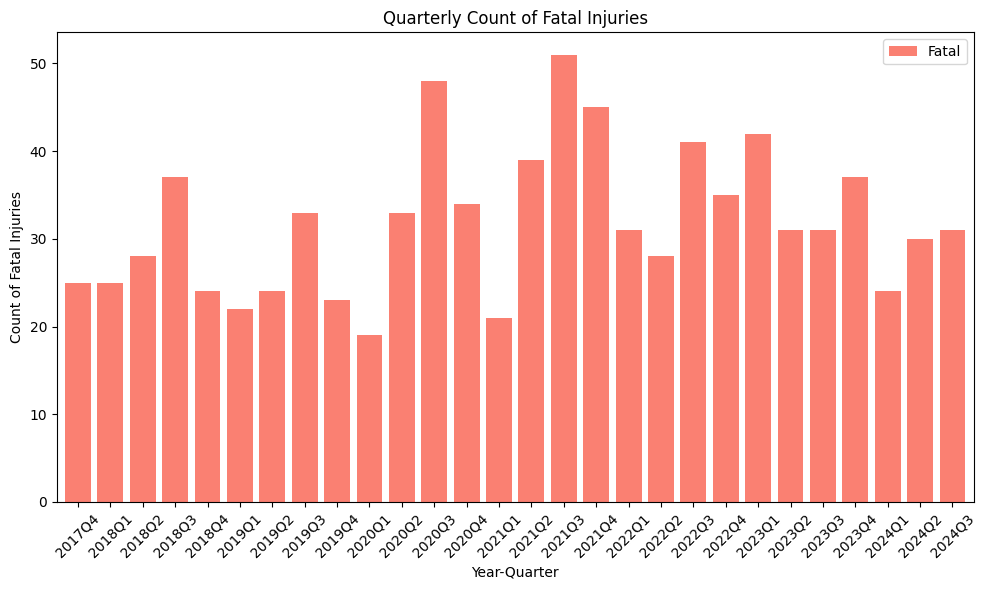

In [ ]:
# Plotting a bar chart of fatal
fig, ax1 = plt.subplots(figsize=(10, 6))
fatal_df.plot(kind='bar', stacked=False, ax=ax1, width=0.8, color='salmon')
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Count of Fatal Injuries')
ax1.set_title('Quarterly Count of Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

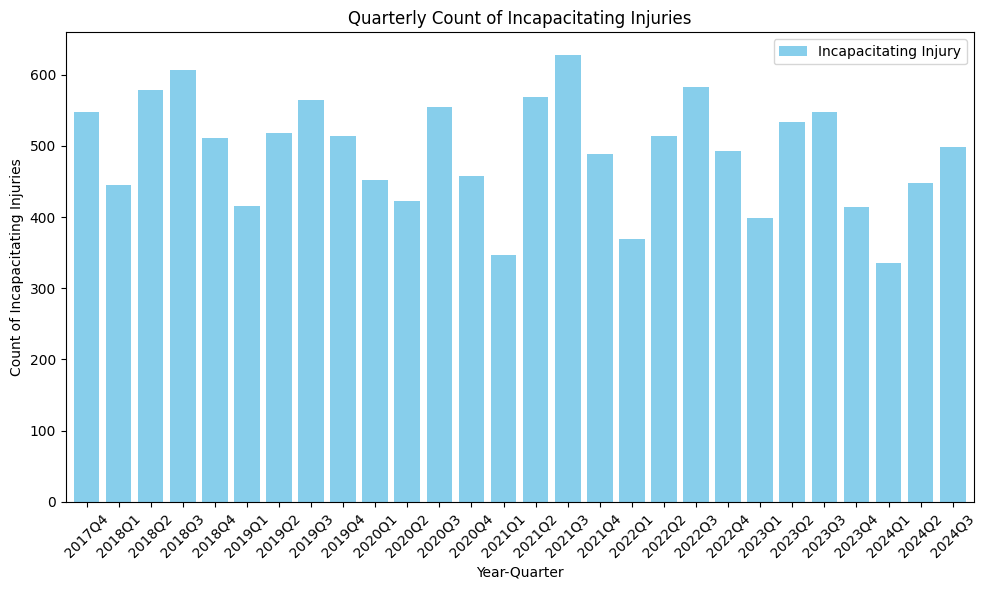

In [ ]:
# plot bar chart of Incapacitating Injury
fig, ax2 = plt.subplots(figsize=(10, 6))
incapacitating_df.plot(kind='bar', stacked=False, ax=ax2, width=0.8, color='skyblue')
ax2.set_xlabel('Year-Quarter')
ax2.set_ylabel('Count of Incapacitating Injuries')
ax2.set_title('Quarterly Count of Incapacitating Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

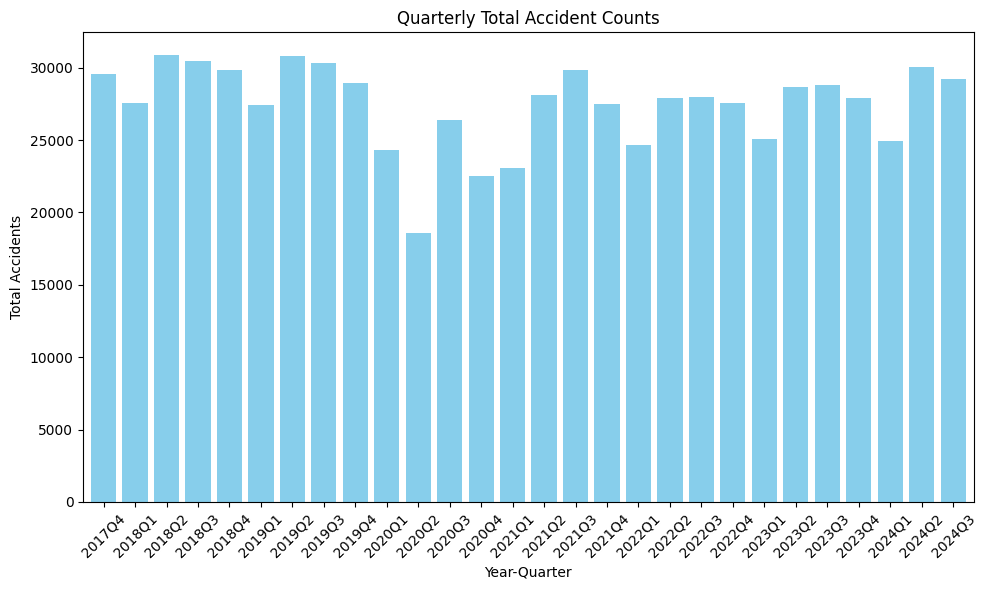

In [ ]:
# sum up total number of accident of each quarter
quarterly_count_1_total = injuries.groupby('YearQuarter').size()

# fatal count and percentage for each quarter
fatal_or_incapacitating_counts = injuries[injuries['most_severe_injury'].isin(['FATAL', 'INCAPACITATING INJURY'])]
quarterly_count_1_severe = fatal_or_incapacitating_counts.groupby('YearQuarter').size()
quarterly_count_1_severe_rate = (quarterly_count_1_severe / quarterly_count_1_total).fillna(0) * 100  # 转换为百分比

# bar chart of total accident counts
plt.figure(figsize=(10, 6))
quarterly_count_1_total.plot(kind='bar', color='skyblue', width=0.8)
plt.xlabel('Year-Quarter')
plt.ylabel('Total Accidents')
plt.title('Quarterly Total Accident Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

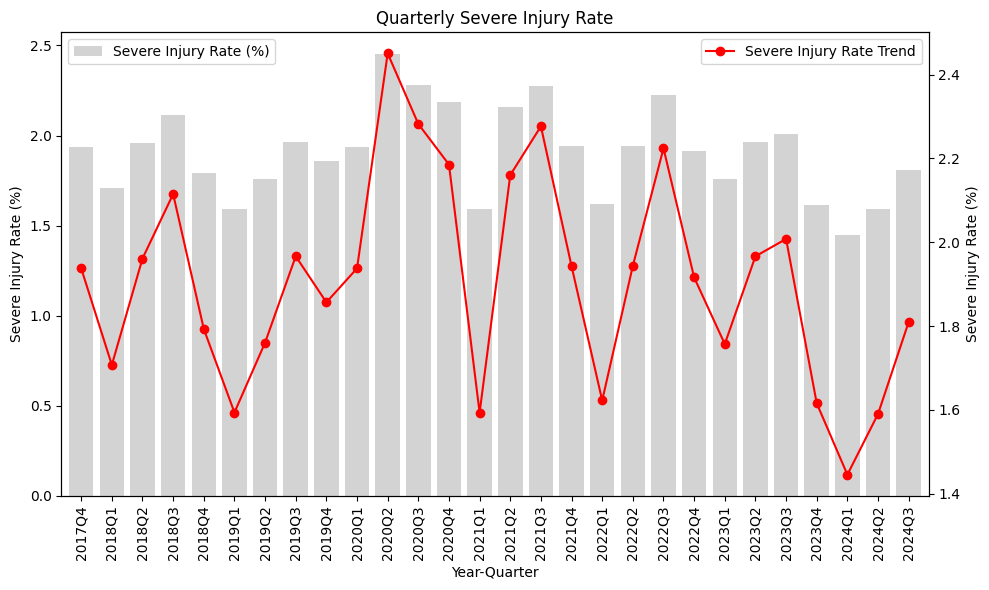

In [ ]:
# bar chart and curve plot of severe injury rate
fig, ax1 = plt.subplots(figsize=(10, 6))

# bar chart of sever injury rate
quarterly_count_1_severe_rate.plot(kind='bar', color='lightgrey', width=0.8, ax=ax1, label='Severe Injury Rate (%)')
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Severe Injury Rate (%)')
ax1.set_title('Quarterly Severe Injury Rate')

# add curve to show the trend
ax2 = ax1.twinx()
ax2.plot(quarterly_count_1_severe_rate.index.astype(str), quarterly_count_1_severe_rate.values, color='red', marker='o', linestyle='-', label='Severe Injury Rate Trend')
ax2.set_ylabel('Severe Injury Rate (%)')

# show legend and layout
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# upload new data
from google.colab import files
uploaded = files.upload()

Saving crash_weather.csv to crash_weather.csv


In [ ]:
import numpy as np

weather = pd.read_csv('crash_weather.csv')

In [ ]:
str(weather)

'                    crash_date weather_condition lighting_condition  \\\n0       08/18/2023 12:50:00 PM             CLEAR           DAYLIGHT   \n1       07/29/2023 02:45:00 PM             CLEAR           DAYLIGHT   \n2       08/18/2023 05:58:00 PM             CLEAR           DAYLIGHT   \n3       11/26/2019 08:38:00 AM             CLEAR           DAYLIGHT   \n4       08/18/2023 10:45:00 AM             CLEAR           DAYLIGHT   \n...                        ...               ...                ...   \n825606  07/10/2023 12:29:00 PM             CLEAR           DAYLIGHT   \n825607  02/29/2020 04:45:00 PM             CLEAR           DAYLIGHT   \n825608  06/01/2020 03:23:00 PM             CLEAR           DAYLIGHT   \n825609  12/26/2018 11:45:00 AM             CLEAR           DAYLIGHT   \n825610  09/08/2020 03:10:00 PM              RAIN               DUSK   \n\n              most_severe_injury  \n0       NONINCAPACITATING INJURY  \n1        NO INDICATION OF INJURY  \n2       NONINCAPACITATIN

In [ ]:
weather.head()

,crash_date,weather_condition,lighting_condition,most_severe_injury
0,08/18/2023 12:50:00 PM,CLEAR,DAYLIGHT,NONINCAPACITATING INJURY
1,07/29/2023 02:45:00 PM,CLEAR,DAYLIGHT,NO INDICATION OF INJURY
2,08/18/2023 05:58:00 PM,CLEAR,DAYLIGHT,NONINCAPACITATING INJURY
3,11/26/2019 08:38:00 AM,CLEAR,DAYLIGHT,FATAL
4,08/18/2023 10:45:00 AM,CLEAR,DAYLIGHT,NO INDICATION OF INJURY


In [ ]:
# Correlation between weather and accident severity
severity_weather = weather.groupby(['weather_condition', 'most_severe_injury']).size().unstack(fill_value=0)
severity_weather

most_severe_injury,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
weather_condition,,,,,
"BLOWING SAND, SOIL, DIRT",0,0,5,1,0
BLOWING SNOW,2,7,360,41,21
CLEAR,803,12179,588837,56321,30264
CLOUDY/OVERCAST,21,435,21242,2147,1374
FOG/SMOKE/HAZE,2,23,1087,138,83
FREEZING RAIN/DRIZZLE,2,34,1378,185,93
OTHER,3,62,1931,246,159
RAIN,93,1476,62516,7338,4115
SEVERE CROSS WIND GATE,1,1,113,12,4


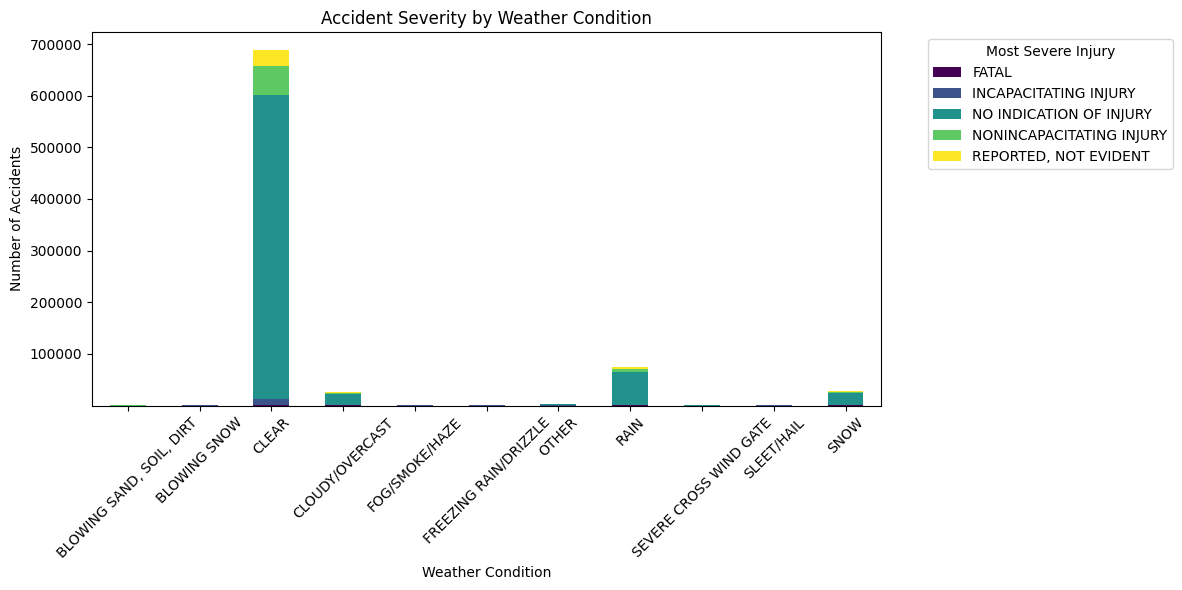

In [ ]:
# plot stacked bar chart
severity_weather.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Accident Severity by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.legend(title="Most Severe Injury", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

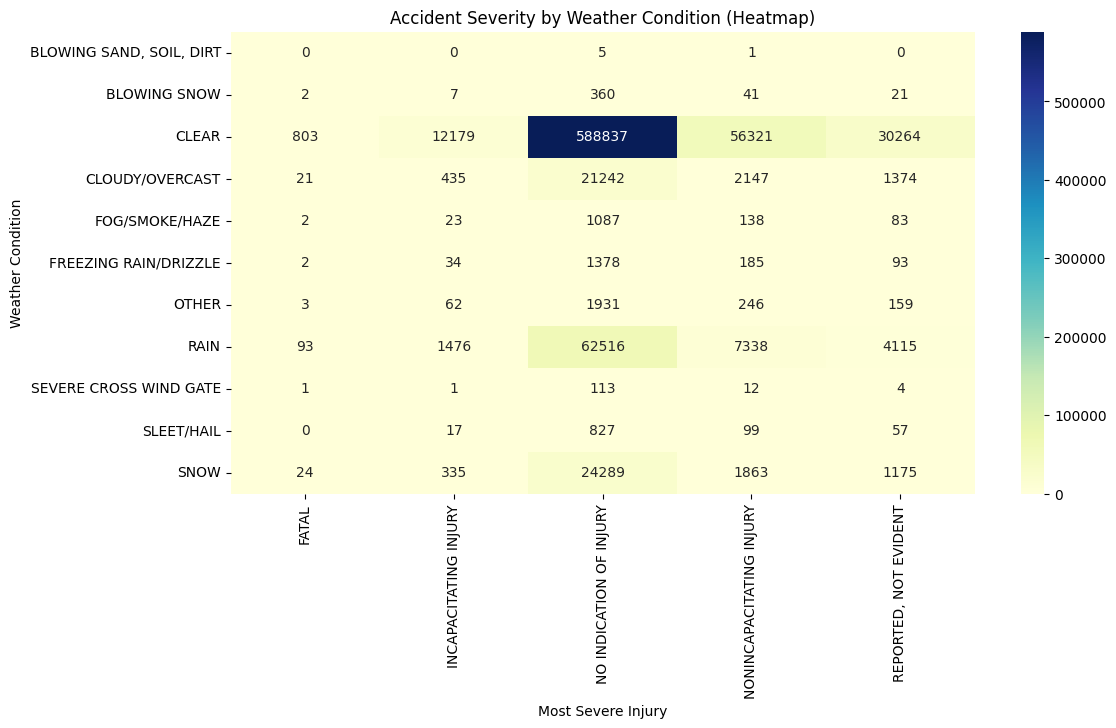

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# reshape data to fit heat maps
plt.figure(figsize=(12, 6))
sns.heatmap(severity_weather, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Accident Severity by Weather Condition (Heatmap)")
plt.xlabel("Most Severe Injury")
plt.ylabel("Weather Condition")
plt.show()


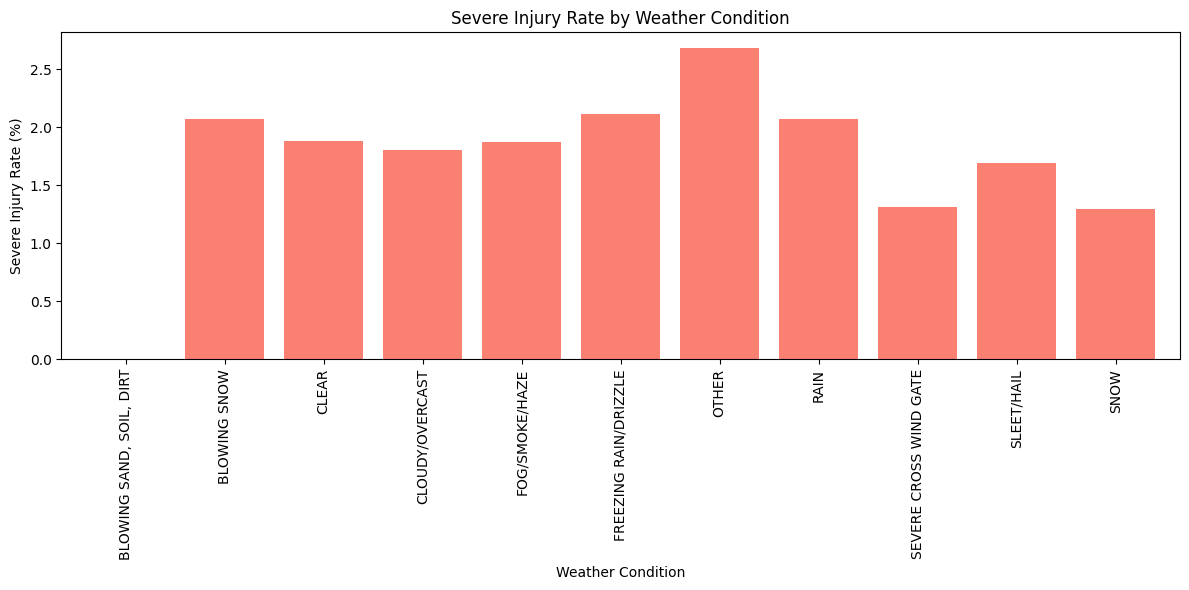

In [ ]:
# define severe injuries
severe_injuries = ['FATAL', 'INCAPACITATING INJURY']

# total number of accidents for each type of weather
total_counts = weather.groupby('weather_condition').size()

# number of severe injuries in each type of weather
severe_counts = weather[weather['most_severe_injury'].isin(severe_injuries)].groupby('weather_condition').size()

# severe rate
severe_rate = (severe_counts / total_counts).fillna(0) * 100

# plot bar chart
plt.figure(figsize=(12, 6))
severe_rate.plot(kind='bar', color='salmon', width=0.8)
plt.title("Severe Injury Rate by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Severe Injury Rate (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

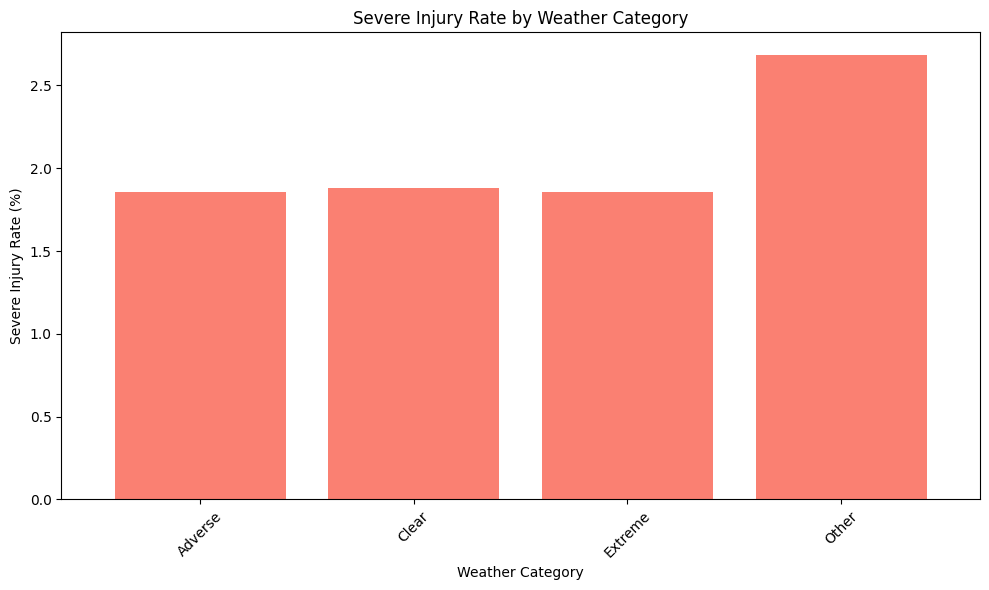

In [ ]:
# define the wweather categorization function
def categorize_weather(condition):
    if condition == 'CLEAR':
        return 'Clear'
    elif condition in ['CLOUDY/OVERCAST', 'FOG/SMOKE/HAZE', 'RAIN', 'SLEET/HAIL', 'SNOW', 'FREEZING RAIN/DRIZZLE']:
        return 'Adverse'
    elif condition in ['BLOWING SAND, SOIL, DIRT', 'BLOWING SNOW', 'SEVERE CROSS WIND GATE']:
        return 'Extreme'
    else:
        return 'Other'

# apply the weather function
weather['weather_category'] = weather['weather_condition'].apply(categorize_weather)

# define severe injuries
severe_injuries = ['FATAL', 'INCAPACITATING INJURY']

# total number of accidents and the number of severe injuries for each weather category
total_counts = weather.groupby('weather_category').size()
severe_counts = weather[weather['most_severe_injury'].isin(severe_injuries)].groupby('weather_category').size()

# severe rate
severe_rate = (severe_counts / total_counts).fillna(0) * 100

# plot the bar chart
plt.figure(figsize=(10, 6))
severe_rate.plot(kind='bar', color='salmon', width=0.8)
plt.title("Severe Injury Rate by Weather Category")
plt.xlabel("Weather Category")
plt.ylabel("Severe Injury Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

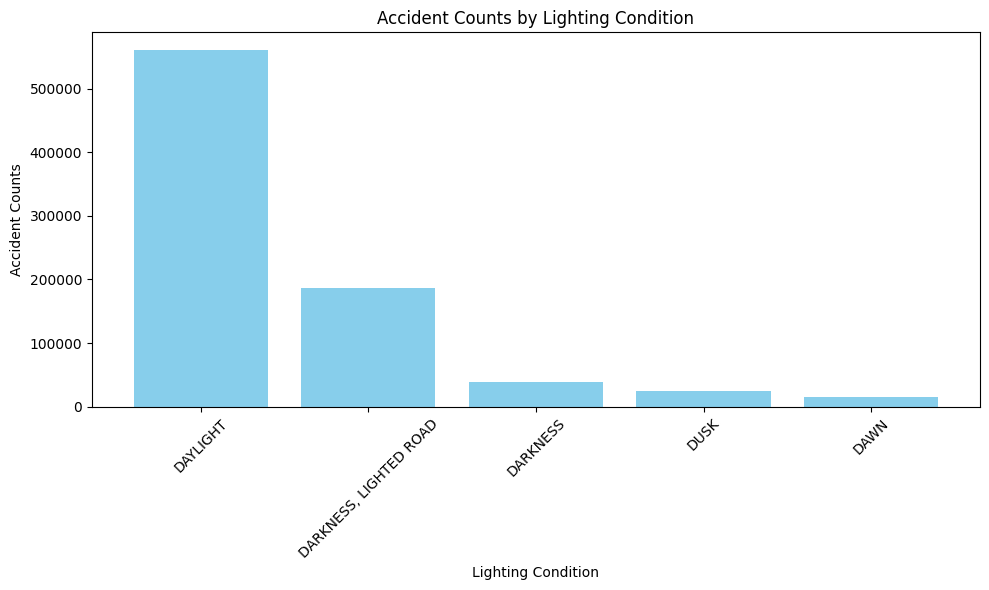

In [ ]:
# number of accidents under different lighting_conditions
lighting_counts = weather['lighting_condition'].value_counts()

# number of severe injuries under each lighting condition
severe_counts_by_lighting = weather[weather['most_severe_injury'].isin(severe_injuries)].groupby('lighting_condition').size()

# percentage of severe injuries under each lighting condition
severe_rate_by_lighting = (severe_counts_by_lighting / lighting_counts).fillna(0) * 100

# plot bar chart of accident counts by lighting conditions
plt.figure(figsize=(10, 6))
lighting_counts.plot(kind='bar', color='skyblue', width=0.8)
plt.title("Accident Counts by Lighting Condition")
plt.xlabel("Lighting Condition")
plt.ylabel("Accident Counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

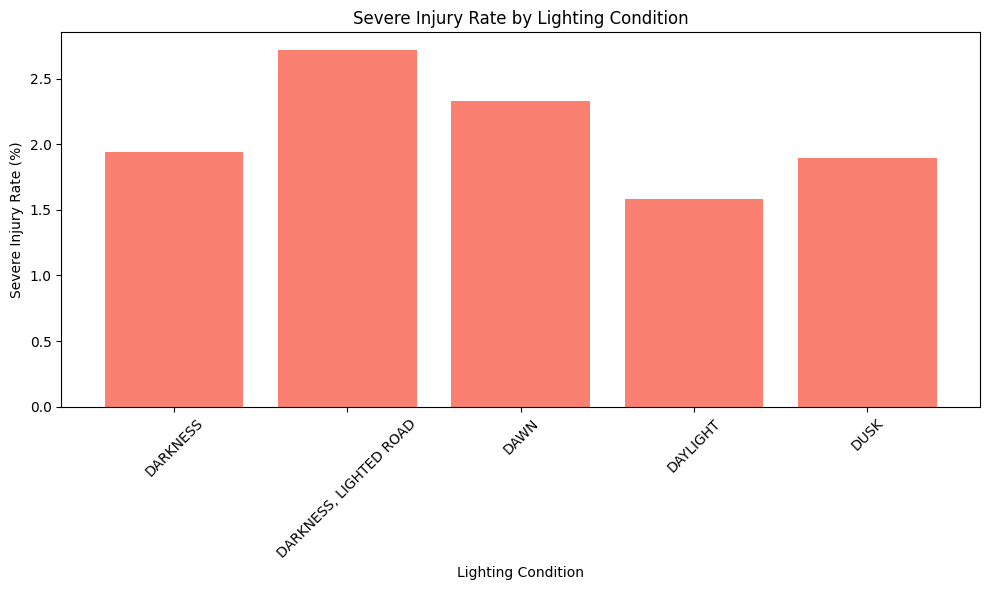

In [ ]:
# bar chart of severe injury rate by lighting condition
plt.figure(figsize=(10, 6))
severe_rate_by_lighting.plot(kind='bar', color='salmon', width=0.8)
plt.title("Severe Injury Rate by Lighting Condition")
plt.xlabel("Lighting Condition")
plt.ylabel("Severe Injury Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()